Loan Application Status Prediction

Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 


Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [2]:
#importing dataset
df = pd.read_csv('loan_prediction.csv')

In [3]:
#checking the data head
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#checking information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
#checking for null values in data
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
#checking target variable
print(df['Loan_Status'].unique())
print(df['Loan_Status'].nunique())
print(df['Loan_Status'].value_counts())

['Y' 'N']
2
Y    422
N    192
Name: Loan_Status, dtype: int64


In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
#checking all the columns
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
#checking data types of variables
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [10]:
#filling the nan values with mode
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])

In [11]:
#filling the nan values with mode
df['Married']=df['Married'].fillna(df['Married'].mode()[0])

In [12]:
#filling the nan values with mode
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])

In [13]:
#filling the nan values with mode
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [14]:
#filling the nan values with mean
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [15]:
#filling the nan values with mean
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

In [16]:
#filling the nan values with mean
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

In [17]:
#checking for null values after removing null values
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

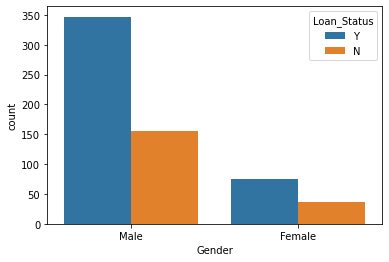

In [18]:
#plotting diagram for relation between dependent and independent variable
sns.countplot(x='Gender',data=df,hue='Loan_Status')
plt.show()

males taking more loans

<function matplotlib.pyplot.show(close=None, block=None)>

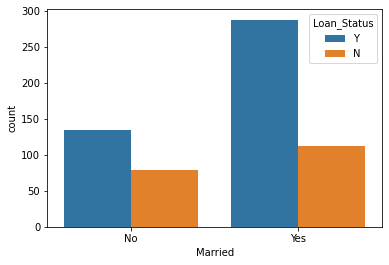

In [19]:
#plotting diagram for relation between dependent and independent variable
sns.countplot(x='Married',data=df, hue = 'Loan_Status')
plt.show

married peopkle taking more loans

<AxesSubplot:xlabel='Dependents', ylabel='count'>

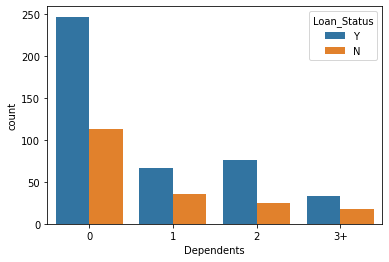

In [20]:
#plotting diagram for relation between dependent and independent variabl
sns.countplot(x='Dependents',data=df, hue='Loan_Status')

peole without dependent takes ore loan

<AxesSubplot:xlabel='Education', ylabel='count'>

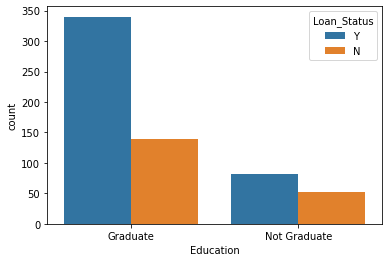

In [21]:
#plotting diagram for relation between dependent and independent variable
sns.countplot(x='Education',data=df, hue='Loan_Status')

graduates applying more for loans

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

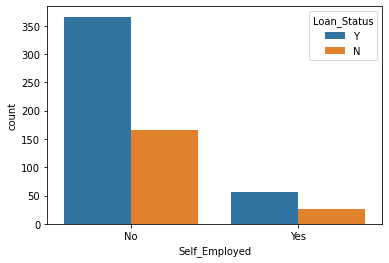

In [22]:
#plotting diagram for relation between dependent and independent variable
sns.countplot(x='Self_Employed',data=df,hue= 'Loan_Status')

self employed people applying more for loans

In [23]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

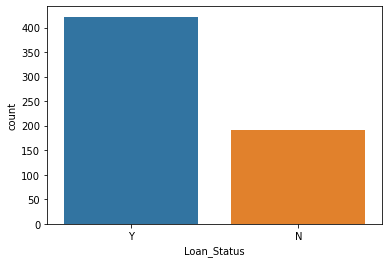

In [24]:
sns.countplot(x='Loan_Status',data=df)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

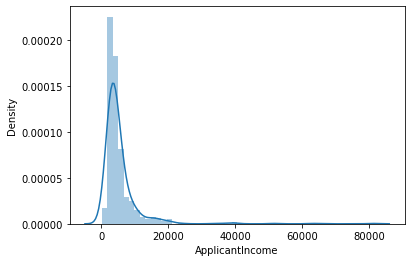

In [25]:
#checking the income range of applicants
sns.distplot(df['ApplicantIncome'])

macimum people having the income range between 2-8000. and the data is right skewed

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

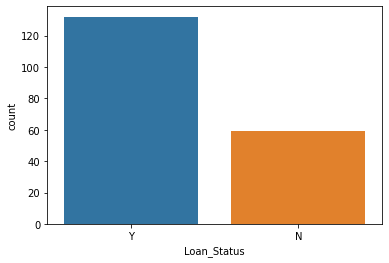

In [26]:
#plotting diagram for relation between dependent and independent variable
sns.countplot(x='Loan_Status',data=df.loc[df['ApplicantIncome']>5000])

checking the loan applicant salary if its more than 5000 or not

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

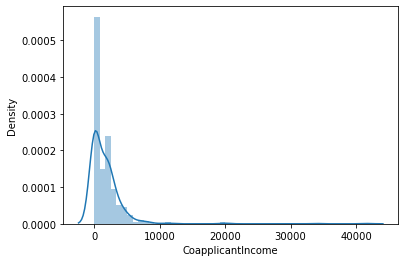

In [27]:
#checking the income of coapplicants
sns.distplot(df['CoapplicantIncome'])

maximum coapplicants having the income range in between 0-5000. and data is skewwed

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

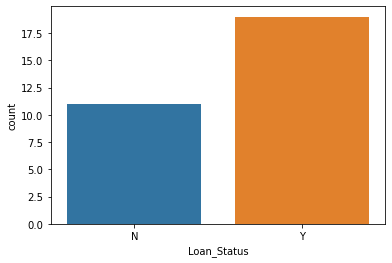

In [28]:
#plotting diagram for relation between dependent and independent variable
sns.countplot(x='Loan_Status',data=df.loc[df['CoapplicantIncome']>5000])

the graaph is showing people with income greter than 5000 have appling more for loans

maximum people appliying fpr the loans in the range of 100-200.data is skewed

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

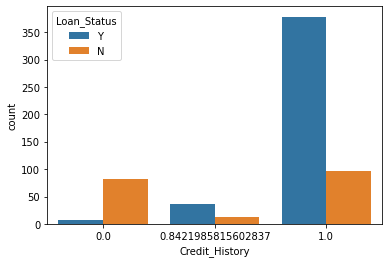

In [29]:
#plotting diagram for relation between dependent and independent variable
sns.countplot(x='Credit_History',data=df,hue='Loan_Status')

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

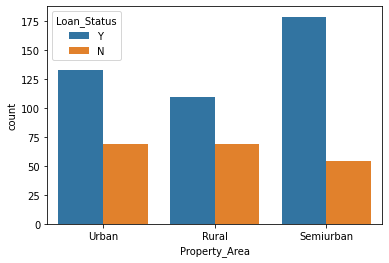

In [30]:
#plotting diagram for relation between dependent and independent variable
sns.countplot(x='Property_Area',data=df,hue='Loan_Status')

semiurban people appling moer loans than urban and rural

In [31]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

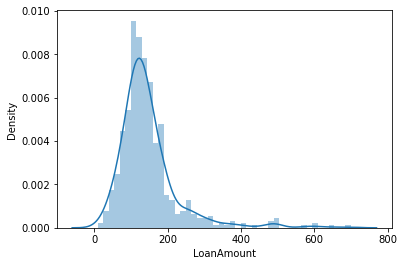

In [32]:
#checking the data for vairables and skewness
sns.distplot(df['LoanAmount'])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

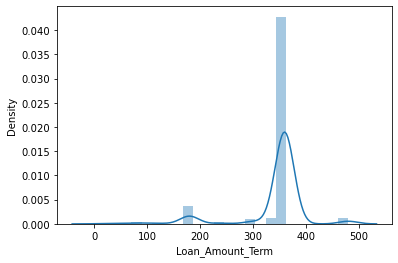

In [33]:
#checking the data for vairables and skewness
sns.distplot(df['Loan_Amount_Term'])

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

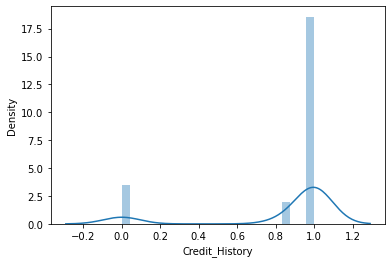

In [34]:
#checking the data for vairables and skewness
sns.distplot(df['Credit_History'])

In [35]:
#cheking for skewness
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
dtype: float64

In [36]:
#treating skewness
skew={'ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History'}

In [37]:
#removing skewness
for col in skew:
    if df.skew().loc[col]>0.50:
        df[col]=np.log1p(df[col])

In [38]:
#checking data after removing skewness
df.skew()

ApplicantIncome      0.482128
CoapplicantIncome   -0.173073
LoanAmount          -0.179713
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
dtype: float64

In [39]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,8.674197,0.000000,4.993232,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,8.430327,7.319202,4.859812,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,8.006701,0.000000,4.204693,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,7.857094,7.765993,4.795791,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,8.699681,0.000000,4.955827,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,8.597482,8.342125,5.590987,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,7.755339,7.324490,4.564348,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,8.018625,7.826044,5.068904,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,8.295798,7.331060,5.129899,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,9.460476,9.302828,5.857933,360.0,1.0,Semiurban,N


In [40]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [41]:
#converting the categorial into int using ordinal encoder
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [42]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1.0,0.0,0.0,0.0,0.0,8.674197,0.000000,4.993232,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,1.0,0.0,0.0,8.430327,7.319202,4.859812,360.0,1.0,0.0,0.0
2,2.0,1.0,1.0,0.0,0.0,1.0,8.006701,0.000000,4.204693,360.0,1.0,2.0,1.0
3,3.0,1.0,1.0,0.0,1.0,0.0,7.857094,7.765993,4.795791,360.0,1.0,2.0,1.0
4,4.0,1.0,0.0,0.0,0.0,0.0,8.699681,0.000000,4.955827,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609.0,0.0,0.0,0.0,0.0,0.0,7.972811,0.000000,4.276666,360.0,1.0,0.0,1.0
610,610.0,1.0,1.0,3.0,0.0,0.0,8.320448,0.000000,3.713572,180.0,1.0,0.0,1.0
611,611.0,1.0,1.0,1.0,0.0,0.0,8.996280,5.484797,5.537334,360.0,1.0,2.0,1.0
612,612.0,1.0,1.0,2.0,0.0,0.0,8.933796,0.000000,5.236442,360.0,1.0,2.0,1.0


In [52]:
df.drop('Loan_ID',axis=1,inplace=True)

In [53]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,8.674197,0.000000,4.993232,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,8.430327,7.319202,4.859812,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,8.006701,0.000000,4.204693,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,7.857094,7.765993,4.795791,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,8.699681,0.000000,4.955827,360.0,1.0,2.0,1.0


In [54]:
df.shape

(614, 12)

In [56]:
#splitting data
x=df.drop(columns=["Loan_Status"])
y=df['Loan_Status']
print(x.shape,y.shape)

(614, 11) (614,)


In [57]:
y.value_counts()

1.0    422
0.0    192
Name: Loan_Status, dtype: int64

In [58]:
#importing libraryand scalling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(x)
x = pd.DataFrame(x,columns=x.columns)

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report 

In [65]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0
for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr =LogisticRegression()
    lr.fit(x_train,y_train)
    predrf= lr.predict(x_test)
    accu = accuracy_score(y_test,predrf)
    if accu >maxAccu:
        maxAccu = accu
        maxRS =i
print('best accuray score is',maxAccu,"random_state is",i)

best accuray score is 0.8648648648648649 random_state is 199


In [67]:
lr= LogisticRegression()
lr.fit(x_train,y_train)
pred= lr.predict(x_test)
print('accuracy score :',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score :
0.7837837837837838
[[ 24  37]
 [  3 121]]
              precision    recall  f1-score   support

         0.0       0.89      0.39      0.55        61
         1.0       0.77      0.98      0.86       124

    accuracy                           0.78       185
   macro avg       0.83      0.68      0.70       185
weighted avg       0.81      0.78      0.76       185



In [68]:
from sklearn.model_selection import cross_val_score
#checking cross validation score for linear regression
cvs = cross_val_score(lr,x,y,cv=5)
print('coss validation score is',cvs.mean())

coss validation score is 0.8078368652538984


In [70]:
#checking acuracy score by decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc = dtc.predict(x_test)
print('accuracy score :',)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

accuracy score :
0.7027027027027027
[[36 25]
 [30 94]]
              precision    recall  f1-score   support

         0.0       0.55      0.59      0.57        61
         1.0       0.79      0.76      0.77       124

    accuracy                           0.70       185
   macro avg       0.67      0.67      0.67       185
weighted avg       0.71      0.70      0.71       185



In [71]:
#checking cross validaton score
cvr= cross_val_score(dtc,x,y,cv=5)
print('cross validation score is', cvs.mean())

cross validation score is 0.8078368652538984


In [72]:
#checking accuracy score byrandom forest classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc= rfc.predict(x_test)
print('accuracy score :',)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

accuracy score :
0.7783783783783784
[[ 28  33]
 [  8 116]]
              precision    recall  f1-score   support

         0.0       0.78      0.46      0.58        61
         1.0       0.78      0.94      0.85       124

    accuracy                           0.78       185
   macro avg       0.78      0.70      0.71       185
weighted avg       0.78      0.78      0.76       185



In [73]:
#checking cross validation score
cvr= cross_val_score(rfc,x,y,cv=5)
print('cross validation score is',cvr.mean())

cross validation score is 0.7850593096094894


In [74]:
#checking accuracy by knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
print('accuracy score :',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score :
0.6594594594594595
[[ 13  48]
 [ 15 109]]
              precision    recall  f1-score   support

         0.0       0.46      0.21      0.29        61
         1.0       0.69      0.88      0.78       124

    accuracy                           0.66       185
   macro avg       0.58      0.55      0.53       185
weighted avg       0.62      0.66      0.62       185



In [75]:
#checking cross validation score
cvs= cross_val_score(knn,x,y,cv=5)
print('cross validation score is',cvs.mean())

cross validation score is 0.70843662534986


In [76]:
#checking accuracy score by adaboost calssifier
from sklearn.ensemble import AdaBoostClassifier
ad = AdaBoostClassifier()
ad.fit(x_train,y_train)
pred = ad.predict(x_test)
print('accuracy score :',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score :
0.7351351351351352
[[ 26  35]
 [ 14 110]]
              precision    recall  f1-score   support

         0.0       0.65      0.43      0.51        61
         1.0       0.76      0.89      0.82       124

    accuracy                           0.74       185
   macro avg       0.70      0.66      0.67       185
weighted avg       0.72      0.74      0.72       185



In [77]:
#checking cross validation score
cvs= cross_val_score(ad,x,y,cv=5)
print('cross validation score is', cvs.mean())

cross validation score is 0.7784752765560443


In [78]:
#checking accuracy sccore by gradiant boosting classiier
from sklearn.ensemble import GradientBoostingClassifier
gd =GradientBoostingClassifier()
gd.fit(x_train,y_train)
pred = gd.predict(x_test)
print('accuarcy score:',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuarcy score:
0.7405405405405405
[[ 27  34]
 [ 14 110]]
              precision    recall  f1-score   support

         0.0       0.66      0.44      0.53        61
         1.0       0.76      0.89      0.82       124

    accuracy                           0.74       185
   macro avg       0.71      0.66      0.68       185
weighted avg       0.73      0.74      0.72       185



In [79]:
#checking cross validation score
cvs= cross_val_score(gd,x,y,cv=5)
print('accuracy score is',cvs.mean())

accuracy score is 0.7752499000399841


In [81]:
from sklearn.ensemble import ExtraTreesClassifier
etc= ExtraTreesClassifier()
etc.fit(x_train,y_train)
pred=etc.predict(x_test)
print('accuracy_score :',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))


accuracy_score :
0.7783783783783784
[[ 26  35]
 [  6 118]]
              precision    recall  f1-score   support

         0.0       0.81      0.43      0.56        61
         1.0       0.77      0.95      0.85       124

    accuracy                           0.78       185
   macro avg       0.79      0.69      0.71       185
weighted avg       0.78      0.78      0.76       185



In [83]:
#checking cross validation score
cvs= cross_val_score(etc,x,y,cv=5)
print('cross validation score is ',cvs.mean())

cross validation score is  0.7622017859522857


In [84]:
#saving the model
import joblib
joblib.dump(lr,'loanapp.pkl')

['loanapp.pkl']